In [1]:
#import nessesary libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("C:\\Users\\megha\\Downloads\\Groceries_dataset - Groceries_dataset.csv")
#view the data
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [3]:
# Convert dataset to list of transactions
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules
import time

In [5]:
# Convert transactions to one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [6]:
# FP-Growth Algorithm
start_time = time.time()
frequent_itemsets_fp = fpgrowth(df, min_support=0.01, use_colnames=True)
execution_time_fp = time.time() - start_time

In [7]:
# Display the frequent itemsets
frequent_itemsets_fp.head()

,support,itemsets
0,0.458184,(whole milk)
1,0.313494,(soda)
2,0.282966,(yogurt)
3,0.206003,(sausage)
4,0.177527,(pastry)


In [8]:
# Apriori Algorithm
start_time = time.time()
frequent_itemsets_ap = apriori(df, min_support=0.01, use_colnames=True)
execution_time_ap = time.time() - start_time

In [9]:
# Display the frequent itemsets
frequent_itemsets_ap.head()

,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)


In [10]:
# Association Rules from FP-Growth
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)
rules_fp.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(rolls/buns, soda)",(whole milk),0.119805,0.458184,0.065162,0.543897,1.187072,0.010269,1.187926,0.179041
1,"(rolls/buns, other vegetables, soda)",(whole milk),0.052591,0.458184,0.031811,0.604878,1.320165,0.007715,1.371264,0.255981
2,"(other vegetables, soda)",(whole milk),0.124166,0.458184,0.069266,0.557851,1.217528,0.012375,1.225416,0.203992
3,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
4,"(yogurt, soda)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,0.009720,1.225537,0.198033


In [11]:
# Association Rules from Apriori
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.5)
rules_ap.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(whole milk),0.078502,0.458184,0.040534,0.516340,1.126928,0.004565,1.120242,0.122227
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
2,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
3,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
4,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,0.007481,1.113034,0.124087


C:\Users\megha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\megha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\megha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


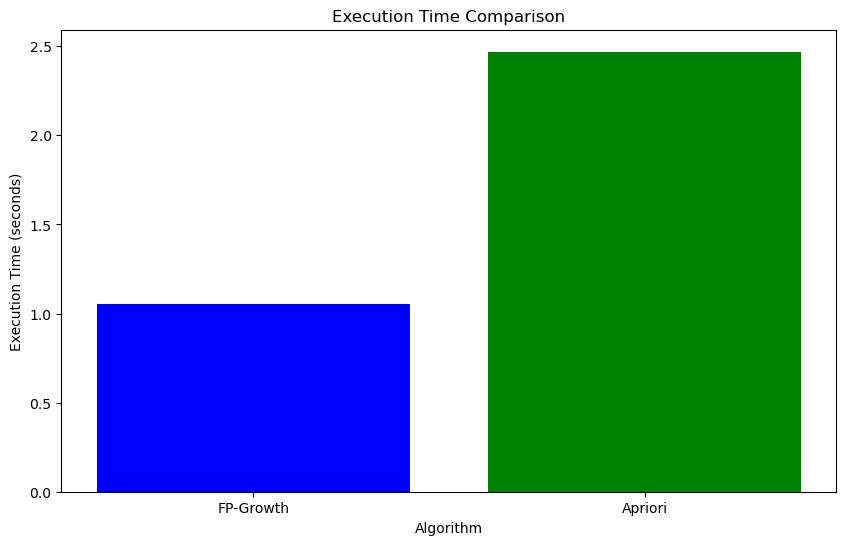

In [12]:
import matplotlib.pyplot as plt

# Data for plotting
algorithms = ['FP-Growth', 'Apriori']
execution_times = [execution_time_fp, execution_time_ap]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, execution_times, color=['blue', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')
plt.show()

<Figure size 1000x600 with 0 Axes>

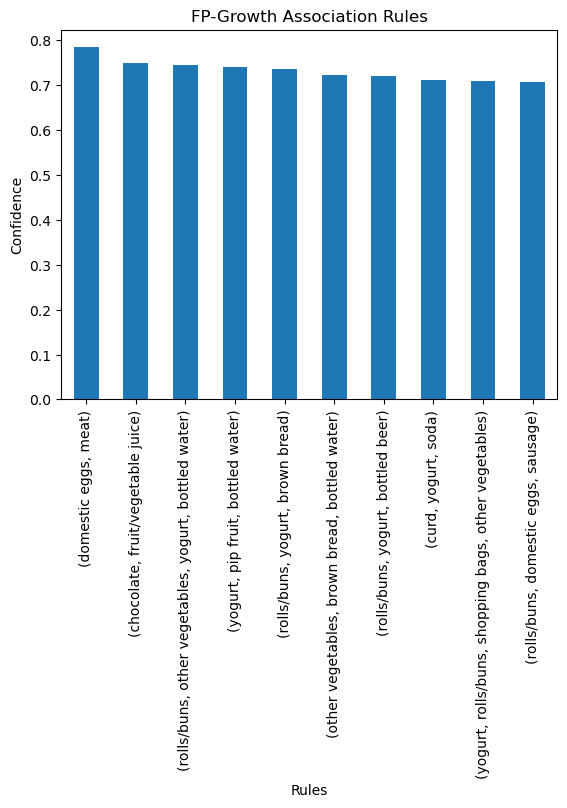

<Figure size 1000x600 with 0 Axes>

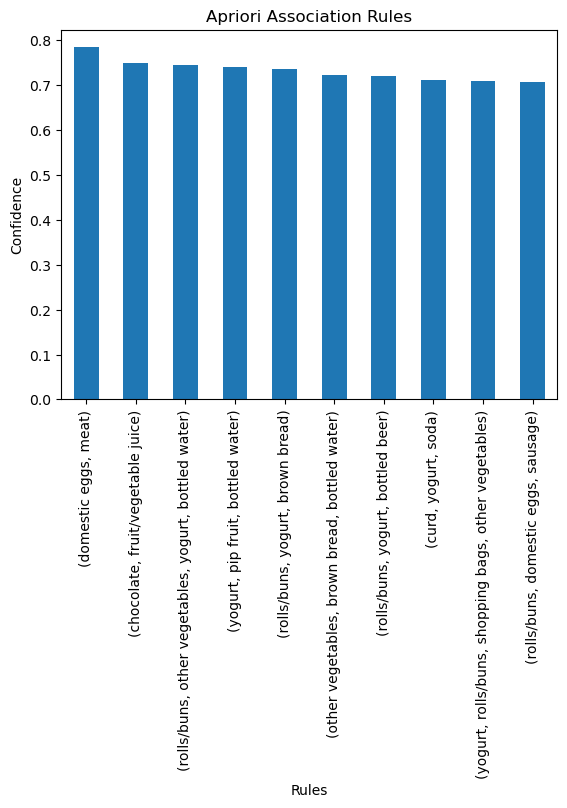

In [13]:
def plot_rules(rules, title):
    plt.figure(figsize=(10, 6))
    rules[['antecedents', 'consequents', 'confidence']].sort_values(by='confidence', ascending=False).head(10).plot(kind='bar', x='antecedents', y='confidence', legend=False)
    plt.title(title)
    plt.xlabel('Rules')
    plt.ylabel('Confidence')
    plt.xticks(rotation=90)
    plt.show()

plot_rules(rules_fp, 'FP-Growth Association Rules')
plot_rules(rules_ap, 'Apriori Association Rules')

In [15]:
frequent_itemsets_fp.to_csv('C:/Users/megha/Documents/frequent_itemsets_fp.csv', index=False)
frequent_itemsets_ap.to_csv('C:/Users/megha/Documents/frequent_itemsets_ap.csv', index=False)
rules_fp.to_csv('C:/Users/megha/Documents/rules_fp.csv', index=False)
rules_ap.to_csv('C:/Users/megha/Documents/rules_ap.csv', index=False)
